<a href="https://colab.research.google.com/github/mishra-atul5001/Data-Science-Medium-Content/blob/master/Hackathon_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objective:
To Predict the probability that a transaction is fraudulent, as denoted by the binary target - **fraud_flag**

### Process:

- Data Understanding  
- Data Cleaning  
- Data Preparation  
- Exploratory Data Analysis(**EDA**)  
- Modelling  
- Evaluation of the Model!  

### Data Understanding

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 300)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from fancyimpute import IterativeImputer as MICE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Features and Description  
- **Amt_Transaction** - transaction payment amount in USD  
- **ProductCD** - product code, the product for each transaction  
- **card1 - card6** - payment card information, such as card type, card category, issue bank, country, etc.  
- **addr** - address  
- **dist** - distance  
- **C1-C14** - counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.  
- **D1-D15** - timedelta, such as days between previous transactions, etc.  
- **M1-M9** - match, such as names on card and address, etc.  
- **Vxxx,Wxxx** - Engineered rich features, including ranking, counting, and other entity relations.“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time period, etc. - Numerical Features”  
- **P_ and (R__) emaildomain** - purchaser and recipient email domain  
- **The Transactiondatetime_insec** feature is a timedelta from a given reference datetime (not an actual timestamp)  
- **id01 to id11** are numerical features for identity, such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc  

In [ ]:
train_data_2 = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/train.csv')
train_data = train_data_2.drop(columns = ['transactionid'],axis=1)
test_data = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/test.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/sample_submission.csv')
train_data.head(8)

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,W91,W92,W93,W94,W95,W96,W97,W98,W99,V102,V121,...,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,7171724,151.000,W,18132,567.0,150.0,mastercard,117.0,debit,272.0,87.0,16.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M0,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,822479,34.000,W,11204,298.0,150.0,visa,226.0,debit,272.0,87.0,7.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,278.0,278.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,278.0,NaN,NaN,NaN,278.0,T,T,T,M0,T,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2225263,35.950,W,766

In [ ]:
print('Shape of Training Data: ',train_data.shape)
print()
print('Shape of Testing Data: ',test_data.shape)
print()
print(train_data.info())

Shape of Training Data:  (364510, 383)

Shape of Testing Data:  (141828, 383)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364510 entries, 0 to 364509
Columns: 383 entries, fraud_flag to DeviceInfo
dtypes: float64(349), int64(3), object(31)
memory usage: 1.0+ GB
None


In [ ]:
train_data.describe()

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,W91,W92,W93,W94,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V140,V142,V144,V146,...,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,364510.000000,3.645100e+05,364510.000000,364510.000000,358722.000000,363760.000000,361880.000000,339043.000000,339043.000000,149470.000000,17640.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364135.000000,186962.000000,198252.000000,256879.000000,170181.000000,29805.000000,14793.000000,40922.000000,40922.000000,313232.000000,179994.000000,25628.000000,23929.000000,26420.000000,306192.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,179994.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.000000,313224.00000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,256861.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,311848.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,306182.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,364488.000000,55053.000000,55053.000000,55053.000000,55053.000000,...,76707.000000,76707.000000,76707.000000,76707.000000,73335.000000,73335.000000,73335.000000,78122.000000,78122.000000,78122.000000,73335.000000,73335.000000,73335.000000,73335.000000,78122.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,78122.000000,73335.000000,73335.000000,73335.000000,78122.000000,78122.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,78122.000000,73335.000000,73335.000000,73335.000000,73335.000000

#### Checking Missing Values!

In [ ]:
def data_frame(df):
    missing_values = df.isnull().sum()
    missing_values_percent =round(100*(df.isnull().sum()/len(df)),2)
    dtype = df.dtypes
    info_df = pd.DataFrame({'Missing Value Count':missing_values,'% of Missing':missing_values_percent,'DTYPE': dtype})
    info_df.sort_values(by = '% of Missing',inplace=True,ascending=False)
    return info_df

In [ ]:
null_value_df = data_frame(train_data)
null_value_df

,Missing Value Count,% of Missing,DTYPE
id_24,361776,99.25,float64
id_07,361543,99.19,float64
id_08,361543,99.19,float64
id_26,361545,99.19,float64
id_25,361555,99.19,float64
...,...,...,...
V285,6,0.00,float64
C14,0,0.00,float64
C13,0,0.00,float64
C12,0,0.00,float64


In [ ]:
num_cols = train_data.select_dtypes(include = ['int64'])
float_cols = train_data.select_dtypes(include = ['float64'])
cat_cols = train_data.select_dtypes(include=['object'])

In [ ]:
print(num_cols.columns)
print()
print(float_cols.columns)
print()
print(cat_cols.columns)

Index(['fraud_flag', 'Transactiondatetime_insec', 'card1'], dtype='object')

Index(['Amt_Transaction', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2', 'C1', 'C2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=349)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


### Data Cleaning

### So, for treatment of Missing Values, we will try something like below:  
- Drop columns with more than **15%** of missing data.  
- Columns with approx missing values of **15%**, pick a suitable **imputation** method.   

In [ ]:
missing_value_percent = 0.10
include_cols = list(train_data.apply(lambda column: True if column.isnull().sum()/train_data.shape[0] < missing_value_percent 
                                     else False))

drop_missing = pd.DataFrame({'features':train_data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,fraud_flag,True
1,Transactiondatetime_insec,True
2,Amt_Transaction,True
3,ProductCD,True
4,card1,True
5,card2,True
6,card3,True
7,card4,True
8,card5,True
9,card6,True


In [ ]:
fraud_final = train_data.loc[:,include_cols]
f1_cols = fraud_final.drop(['fraud_flag'],axis=1).columns
fraud_final_cols = fraud_final.columns
fraud_final_cols

Index(['fraud_flag', 'Transactiondatetime_insec', 'Amt_Transaction',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'W95', 'W96', 'W97', 'W98',
       'W99', 'V102', 'V121', 'V124', 'V125', 'V126', 'V127', 'V128', 'V130',
       'V131', 'V133', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283',
       'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292',
       'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310',
       'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319',
       'V320', 'V321'],
      dtype='object')

In [ ]:
# Preparing the Test Set
test_data = test_data.loc[:,f1_cols]
test_data.head()

,Transactiondatetime_insec,Amt_Transaction,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,10727480,107.95,W,15484,418.0,150.0,visa,226.0,debit,264.0,87.0,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,14.0,2.0,499.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,15274250,55.00,W,16630,242.0,150.0,visa,166.0,debit,272.0,87.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,4.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,10892344,103.95,W,4436,174.0,150.0,visa,226.0,debit,337.0,87.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,22.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,358.850006,98.949997,358.850006,98.949997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,358.850006,98.949997,0.0,358.850006,0.0,98.949997,160.949997,358.850006,160.949997,0.0,0.0,0.0,0.0,0.0,0.0
3,14825733,135.00,H,1804,161.0,150.0,mastercard,117.0,debit,123.0,87.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,11598295,49.00,W,3301,555.0,150.0,visa,226.0,debit,387.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_frame(fraud_final)

,Missing Value Count,% of Missing,DTYPE
addr1,25467,6.99,float64
addr2,25467,6.99,float64
card2,5788,1.59,float64
card5,2630,0.72,float64
card3,750,0.21,float64
card4,757,0.21,object
card6,754,0.21,object
V314,375,0.10,float64
V315,375,0.10,float64
D1,375,0.10,float64


In [ ]:
fraud_final.head(8)

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,7171724,151.000,W,18132,567.0,150.0,mastercard,117.0,debit,272.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
1,0,822479,34.000,W,11204,298.0,150.0,visa,226.0,debit,272.0,87.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,278.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
2,0,2225263,35.950,W,7664,490.0,150.0,visa,226.0,debit,264.0,87.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,71.900002,71.900002,71.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,71.900002,71.900002,71.900002
3,0,8440610,209.950,W,1893,514.0,150.0,mastercard,224.0,credit,123.0,87.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
4,0,4296781,37.545,C,12695,490.0,150.0,visa,226.0,debit,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,75.090401,75.090401,75.090401,0.0,0.0,37.5452,37.5452,37.5452,2.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,75.090401,75.090401,75.090401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.5452,37.5452,37.5452,37.545200,37.545200,37.545200
5,0,866514,100.000,H,6234,555.0,150.0,visa,226.0,debit,327.0,87.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
6,0,7651890,97.950,W,10960,567.0,150.0,mastercard,117.0,debit,494.0,87.0,4.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
7,0,1158139,41.102,C,9917,142.0,185.0,visa,138.0,debit,NaN,NaN,1845.0,2358.0,0.0,1133.0,0.0,1133.0,1134.0,1697.0,0.0,1865.0,1527.0,1527.0,1651.0,761.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000


In [ ]:
cat_cols_1 = fraud_final.select_dtypes(include=['object'])

print('Number of Categorical Columns Left:',len(cat_cols_1))

for i in cat_cols_1:
    print('Total Unique values in column ->',i,':',fraud_final[i].nunique())
    print(fraud_final[i].value_counts())
    print()

Number of Categorical Columns Left: 364510
Total Unique values in column -> ProductCD : 5
W    282328
R     30386
C     26958
H     21474
S      3364
Name: ProductCD, dtype: int64

Total Unique values in column -> card4 : 4
visa                238853
mastercard          113791
american express      6485
discover              4624
Name: card4, dtype: int64

Total Unique values in column -> card6 : 4
debit              266072
credit              97652
debit or credit        25
charge card             7
Name: card6, dtype: int64



### Data Preparation

Now, here is some decision to be made. Since, we have max of **5 to 4** levels, we have decided to perform dummy variable one-hot encoding which will create our **Categorical Features** to **Numerical Features**

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
fraud_categorical = fraud_final.select_dtypes(include=['object'])
fraud_categorical.head()

,ProductCD,card4,card6
0,W,mastercard,debit
1,W,visa,debit
2,W,visa,debit
3,W,mastercard,credit
4,C,visa,debit


In [ ]:
# convert into dummies
fraud_dummies = pd.get_dummies(fraud_categorical, drop_first=True)
fraud_dummies.head()

,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
0,0,0,0,1,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0
2,0,0,0,1,0,0,1,0,1,0
3,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,1,0,1,0


In [ ]:
# drop categorical variables 
fraud_final = fraud_final.drop(list(fraud_categorical.columns), axis=1)

# concat dummy variables with X
fraud_final = pd.concat([fraud_final, fraud_dummies], axis=1)

Let's do the same for TEST SET. Checking UNIQUE Values and then dummying them!

In [ ]:
cat_cols_1 = fraud_final.select_dtypes(include=['object'])

print('Number of Categorical Columns Left:',len(cat_cols_1))

for i in cat_cols_1:
    print('Total Unique values in column ->',i,':',fraud_final[i].nunique())
    print(fraud_final[i].value_counts())
    print()

Number of Categorical Columns Left: 364510


In [ ]:
# subset all categorical variables
test_fraud_categorical = test_data.select_dtypes(include=['object'])
test_fraud_categorical.head()

,ProductCD,card4,card6
0,W,visa,debit
1,W,visa,debit
2,W,visa,debit
3,H,mastercard,debit
4,W,visa,debit


In [ ]:
# convert into dummies
test_fraud_dummies = pd.get_dummies(test_fraud_categorical, drop_first=True)
test_fraud_dummies.head()

,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_debit,card6_debit or credit
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,1,0
2,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,1,1,0


In [ ]:
# drop categorical variables 
test_fraud_final = test_data.drop(list(test_fraud_categorical.columns), axis=1)

# concat dummy variables with X
test_fraud_final = pd.concat([test_fraud_final, test_fraud_dummies], axis=1)

In [ ]:
cat_cols = fraud_final.select_dtypes(include=['object']).columns

print('Number of Categorical Columns Left:',len(cat_cols))
print('New Shape:',fraud_final.shape)

Number of Categorical Columns Left: 0
New Shape: (364510, 94)


In [ ]:
cat_cols = test_fraud_final.select_dtypes(include=['object']).columns

print('Number of Categorical Columns Left:',len(cat_cols))
print('New Shape:',test_fraud_final.shape)

Number of Categorical Columns Left: 0
New Shape: (141828, 92)


In [ ]:
# list_train_data = fraud_final.columns.tolist()
# list_test_data = test_fraud_final.columns.tolist()
# print('The columns in train set but not in test set: ', (list_train_data - list_test_data))
fraud_final.columns.difference(test_fraud_final.columns)

Index(['card6_credit', 'fraud_flag'], dtype='object')

There is one important thing to notice! We have one extra Level of **Card 6 with CREDIT as Level**. Now after much research, this problem can be stated as below:


*   **No. of levels in the variable in training set > No. of levels in the variable in test set.**
Here, since the *testing set has one level less, we need not include the one extra level in our model.*
That is,
Apply the model only for “Debit”, “Debit or Credit” and “Charge Card” and then implement it like that on the test data. **There is a high probability that the extra level is only increasing noise.**
You can club some of the levels together(if the counts are very different) and use one hot encoding.
*   **No. of levels in the variable in training set < No. of levels in the variable in test set.**
In this case, you have got no choice but to apply the model on the levels you have in the training set.



In [ ]:
fraud_final = fraud_final.drop(['card6_credit'],axis=1)

In [ ]:
# Fetching new set of Columns!
fraud_final_cols = fraud_final.columns

# Using FANCY IMPUTER Methodology for Imputing in an AUTOMATED MANNER
fraud_imputing = MICE(n_iter=1).fit_transform(fraud_final)
fraud_ready = pd.DataFrame(fraud_imputing, columns=fraud_final_cols)
data_frame(fraud_ready)

,Missing Value Count,% of Missing,DTYPE
fraud_flag,0,0.0,float64
V297,0,0.0,float64
V306,0,0.0,float64
V305,0,0.0,float64
V304,0,0.0,float64
V303,0,0.0,float64
V302,0,0.0,float64
V301,0,0.0,float64
V300,0,0.0,float64
V299,0,0.0,float64


### EDA 

- An important step to explore some features manually to present valid insights!

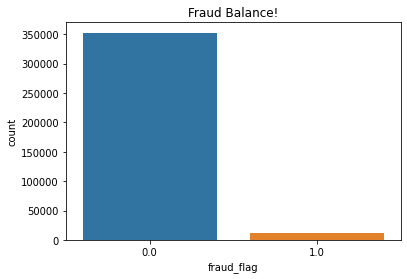

In [ ]:
# target variable: fraud_flag
plt.title('Fraud Balance!');
sns.countplot(fraud_ready.fraud_flag);

In [ ]:
fraud_ready.describe()

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_debit,card6_debit or credit
count,364510.000000,3.645100e+05,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,364510.000000,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000
mean,0.033116,5.127139e+06,161.000194,9859.890184,373.563324,152.049341,210.457438,290.937892,87.797390,13.824814,14.569331,0.004003,3.854558,5.558498,9.001797,2.527889,4.704516,4.465820,4.675861,10.030674,3.608244,31.814845,8.271968,95.428401,1.217993,-4.326706,-1.607037,5.725606,-13.917328,-1.828655e+02,1.347010,3.030344,-3.279602,-1.606728e+04,237.097711,-1.040388e+04,109.138595,5.442957e+03,1.916775e+03,-1.705146e+03,-4.468595e+04,6.417580e+04,7.767729e+04,0.041211,0.767076,0.980875,3.913145e+03,6.292280e+03,-5.709951e+02,4.831971e+03,0.185129,0.234185,-1.003811e+03,4.193136e+03,-7.511158e+02,6.112977e+03,1.325278e+04,7.355880e+03,0.187901,2.032678e+03,1.393880e+03,2.448719e+03,0.047991,0.053866,2.788039e+01,-2.310801e+01,3.229478e+01,1.000116,3.649335e+05,4.385354e+05,4.595962e+05,-4.772457e+04,-6.053710e+04,7.188742e+04,-6.164128e+04,24.351569,45.322392,30.425331,2.158874e+04,2.617451e+04,2.730025e+04,1.802611e+03,2.195085e+03,2.271343e+03,0.058912,0.083361,0.009229,0.774541,0.012686,0.312175,0.655271,0.729944,0.000069
std,0.178939,3.197582e+06,263.076820,4895.519430,1190.952043,9.326880,519.735616,99.480042,421.518060,130.925623,151.102003,0.095712,67.110131,25.376168,69.974050,59.986622,92.801582,16.580624,92.557901,92.158599,84.335720,126.992845,48.612318,183.835788,127.432779,724.393584,273.347718,729.239342,1893.632920,2.359073e+04,44.200762,250.805207,556.588499,2.074806e+06,7221.431367,1.350708e+06,2204.122516,6.966562e+05,2.388563e+05,2.230156e+05,5.755542e+06,1.581834e+07,1.914615e+07,1.486218,1.945091,1.568450,9.645151e+05,1.550698e+06,1.407489e+05,1.190934e+06,0.530578,0.642152,2.476918e+05,1.033154e+06,1.854357e+05,1.506712e+06,3.266398e+06,1.813024e+06,1.193590,5.010092e+05,3.435328e+05,6.035501e+05,0.303248,0.324549,6.817839e+03,5.753279e+03,7.904664e+03,0.026831,8.993591e+07,1.080281e+08,1.132545e+08,1.176724e+07,1.495278e+07,1.771858e+07,1.520479e+07,108.740210,181.643445,129.381933,5.314491e+06,6.425861e+06,6.716226e+06,4.397772e+05,5.332898e+05,5.541617e+05,0.235460,0.276428,0.095623,0.417885,0.111914,0.463382,0.475280,0.443989,0.008281
min,0.000000,8.640000e+04,30.029000,1001.000000,-22345.187261,100.000000,-

Let's treat Our Outliers!

In [ ]:
fraud_ready.fraud_flag = fraud_ready.fraud_flag.astype('int')
col_to_remove = [col for col in fraud_ready.columns if fraud_ready[col].std()==0]

fraud_ready = fraud_ready.drop(col_to_remove,axis=1)

fraud_ready.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_debit,card6_debit or credit
count,364510.000000,3.645100e+05,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,364510.000000,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000
mean,0.033116,5.127139e+06,161.000194,9859.890184,373.563324,152.049341,210.457438,290.937892,87.797390,13.824814,14.569331,0.004003,3.854558,5.558498,9.001797,2.527889,4.704516,4.465820,4.675861,10.030674,3.608244,31.814845,8.271968,95.428401,1.217993,-4.326706,-1.607037,5.725606,-13.917328,-1.828655e+02,1.347010,3.030344,-3.279602,-1.606728e+04,237.097711,-1.040388e+04,109.138595,5.442957e+03,1.916775e+03,-1.705146e+03,-4.468595e+04,6.417580e+04,7.767729e+04,0.041211,0.767076,0.980875,3.913145e+03,6.292280e+03,-5.709951e+02,4.831971e+03,0.185129,0.234185,-1.003811e+03,4.193136e+03,-7.511158e+02,6.112977e+03,1.325278e+04,7.355880e+03,0.187901,2.032678e+03,1.393880e+03,2.448719e+03,0.047991,0.053866,2.788039e+01,-2.310801e+01,3.229478e+01,1.000116,3.649335e+05,4.385354e+05,4.595962e+05,-4.772457e+04,-6.053710e+04,7.188742e+04,-6.164128e+04,24.351569,45.322392,30.425331,2.158874e+04,2.617451e+04,2.730025e+04,1.802611e+03,2.195085e+03,2.271343e+03,0.058912,0.083361,0.009229,0.774541,0.012686,0.312175,0.655271,0.729944,0.000069
std,0.178939,3.197582e+06,263.076820,4895.519430,1190.952043,9.326880,519.735616,99.480042,421.518060,130.925623,151.102003,0.095712,67.110131,25.376168,69.974050,59.986622,92.801582,16.580624,92.557901,92.158599,84.335720,126.992845,48.612318,183.835788,127.432779,724.393584,273.347718,729.239342,1893.632920,2.359073e+04,44.200762,250.805207,556.588499,2.074806e+06,7221.431367,1.350708e+06,2204.122516,6.966562e+05,2.388563e+05,2.230156e+05,5.755542e+06,1.581834e+07,1.914615e+07,1.486218,1.945091,1.568450,9.645151e+05,1.550698e+06,1.407489e+05,1.190934e+06,0.530578,0.642152,2.476918e+05,1.033154e+06,1.854357e+05,1.506712e+06,3.266398e+06,1.813024e+06,1.193590,5.010092e+05,3.435328e+05,6.035501e+05,0.303248,0.324549,6.817839e+03,5.753279e+03,7.904664e+03,0.026831,8.993591e+07,1.080281e+08,1.132545e+08,1.176724e+07,1.495278e+07,1.771858e+07,1.520479e+07,108.740210,181.643445,129.381933,5.314491e+06,6.425861e+06,6.716226e+06,4.397772e+05,5.332898e+05,5.541617e+05,0.235460,0.276428,0.095623,0.417885,0.111914,0.463382,0.475280,0.443989,0.008281
min,0.000000,8.640000e+04,30.029000,1001.000000,-22345.187261,100.000000,-

This table shows there are outliers in the data set.

And we need to think about the percentile we should use as the cut off. So that we don't loose much of our data. 1%ile and 99%ile should be fine

In [ ]:
cont_cols = [col for col in fraud_ready.columns if col not in ['fraud_flag']]

for col in cont_cols:
    percentiles = fraud_ready[col].quantile([0.01,0.99]).values
    fraud_ready[col][fraud_ready[col] <= percentiles[0]] = percentiles[0]
    fraud_ready[col][fraud_ready[col] >= percentiles[1]] = percentiles[1]

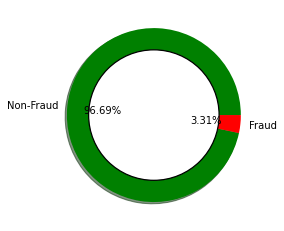

In [ ]:
colors = [ 'green', 'red']
plt.pie(fraud_ready["fraud_flag"].value_counts(), colors=colors, labels=['Non-Fraud','Fraud'],
        autopct='%1.2f%%', shadow=True);
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25);
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

In [ ]:
data_frame(fraud_ready)

,Missing Value Count,% of Missing,DTYPE
fraud_flag,0,0.0,int64
V297,0,0.0,float64
V306,0,0.0,float64
V305,0,0.0,float64
V304,0,0.0,float64
V303,0,0.0,float64
V302,0,0.0,float64
V301,0,0.0,float64
V300,0,0.0,float64
V299,0,0.0,float64


In [ ]:
predictor_variables = fraud_ready.drop(columns = ['fraud_flag'],axis=1)
target_variable = fraud_ready['fraud_flag']
Counter(target_variable)

Counter({0: 352439, 1: 12071})

In [ ]:
data_frame(predictor_variables)

,Missing Value Count,% of Missing,DTYPE
Transactiondatetime_insec,0,0.0,float64
V297,0,0.0,float64
V306,0,0.0,float64
V305,0,0.0,float64
V304,0,0.0,float64
V303,0,0.0,float64
V302,0,0.0,float64
V301,0,0.0,float64
V300,0,0.0,float64
V299,0,0.0,float64


Now comes **MODELLING**!!

*   Then we will apply PCA as we have around 92 features and hence it important to understand the features which are influencing the model!



In [ ]:

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = predictor_variables.columns
predictor_variables = pd.DataFrame(scale(predictor_variables))
predictor_variables.columns = cols
# X.columns


X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variable, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (255156, 92)
Number transactions y_train dataset:  (255156,)
Number transactions X_test dataset:  (109353, 92)
Number transactions y_test dataset:  (109353,)


In [ ]:
data_frame(X_train)

,Missing Value Count,% of Missing,DTYPE
Transactiondatetime_insec,0,0.0,float64
V297,0,0.0,float64
V306,0,0.0,float64
V305,0,0.0,float64
V304,0,0.0,float64
V303,0,0.0,float64
V302,0,0.0,float64
V301,0,0.0,float64
V300,0,0.0,float64
V299,0,0.0,float64


In [ ]:
# Applying PCA
pca = PCA(svd_solver='randomized' , random_state=42)
pca.fit(X_train)

# Printing the PCA Components
print(pca.components_)

[[ 1.08468625e-02  3.87688911e-02 -3.48721161e-04 ...  2.07473038e-03
   4.00522040e-04  0.00000000e+00]
 [-4.89856002e-02  7.88663731e-03 -3.46361698e-03 ... -1.63884931e-02
  -1.21858500e-01  0.00000000e+00]
 [-3.02618204e-02 -4.56150318e-02 -6.71460743e-04 ... -6.39180936e-03
  -3.64984151e-02 -0.00000000e+00]
 ...
 [-0.00000000e+00 -3.21711449e-17 -1.42883059e-16 ... -1.38777878e-17
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -3.33934269e-17 -2.11190041e-17 ... -3.81639165e-17
  -1.38777878e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [ ]:
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'PC11':pca.components_[10],'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'PC16':pca.components_[15],'PC17':pca.components_[16],
                       'PC18':pca.components_[17],'PC19':pca.components_[18],'PC20':pca.components_[19],'PC21':pca.components_[20],
                       'PC22':pca.components_[21],'PC23':pca.components_[22],'PC24':pca.components_[23],'PC25':pca.components_[24],'PC26':pca.components_[25],
                       'PC27':pca.components_[26],'PC28':pca.components_[27],'PC29':pca.components_[28],'PC30':pca.components_[29],'PC31':pca.components_[30],
                       'PC32':pca.components_[31],'PC33':pca.components_[32],'PC34':pca.components_[33],'PC35':pca.components_[34],'PC36':pca.components_[35],
                       'PC37':pca.components_[36],'PC38':pca.components_[37],'PC39':pca.components_[38],
                       'Feature':colnames})
pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,Feature
0,0.010847,-0.048986,-0.030262,0.024446,0.052627,-0.005229,0.048027,-0.048418,0.124729,0.010757,0.157554,0.128236,0.444808,-0.228173,-0.166364,0.129220,-0.038686,0.135834,-0.100014,0.059276,-0.263989,-0.040112,0.098784,0.190007,0.284298,0.053184,0.379293,-0.485224,-0.100958,-0.046239,-0.041206,-0.026759,0.019114,0.018179,0.007892,0.006975,-0.020983,0.008270,0.002831,Transactiondatetime_insec
1,0.038769,0.007887,-0.045615,0.061616,0.011369,-0.023121,-0.118595,0.059083,-0.026046,0.290188,0.210005,0.117198,0.099169,0.026519,0.197484,-0.058816,-0.091613,-0.013303,-0.073375,-0.035982,-0.036953,-0.055295,0.337362,0.306022,-0.028843,-0.322589,-0.119248,0.123817,0.105374,-0.255613,0.561383,-0.043403,0.075148,-0.001727,0.019434,-0.059549,0.064067,0.037080,-0.002289,Amt_Transaction
2,-0.000349,-0.003464,-0.000671,0.004945,0.005632,-0.010068,0.001336,-0.000154,0.007625,-0.009385,0.010270,-0.045009,-0.019428,-0.012515,-0.215963,-0.325406,-0.314851,-0.424119,-0.307027,0.611893,0.065740,-0.058230,-0.064433,0.111036,0.040490,0.078517,-0.009868,0.076443,-0.042885,-0.219305,-0.093413,0.006828,0.002044,-0.002730,-0.000596,-0.002471,0.000647,0.004118,0.000749,card1
3,0.000744,0.035456,0.008634,-0.000242,-0.008909,0.018907,-0.016099,-0.002238,-0.080362,0.003917,0.018147,0.069002,0.022517,0.049758,0.161073,0.040593,0.147431,-0.696555,0.154457,-0.211722,-0.517456,0.072903,-0.107704,-0.015592,0.189468,0.210676,-0.073922,0.001526,-0.002144,0.010974,0.092386,-0.013404,-0.006864,0.004547,0.002458,-0.007225,-0.001015,-0.004445,0.016836,card2
4,-0.015964,0.138304,0.103984,-0.095343,-0.029736,0.053683,0.123631,-0.115244,0.254161,-0.069837,0.269397,-0.143019,0.018050,-0.050237,0.078689,-0.062010,0.093101,-0.044465,-0.030591,-0.016009,0.026569,-0.009791,-0.075704,-0.244885,-0.155997,-0.064742,-0.002027,-0.064205,0.006301,-0.179979,0.082198,-0.002931,0.057923,0.031238,0.047926,0.002124,-0.021626,-0.039557,-0.069353,card3
5,0.004652,-0.045211,-0.018667,0.022583,-0.013839,-0.003900,0.032691,-0.005670,-0.327825,-0.206119,0.176557,-0.003234,-0.061412,0.006127,-0.139228,-0.063627,-0.069866,0.101367,0.120404,-0.321109,-0.087851,0.013048,0.101694,0.147530,0.012990,0.006957,0.007139,0.178132,-0.106084,-0.647086,-0.386409,0.029451,0.028484,0.002732,0.013910,0.000381,-0.004297,0.002862,0.001607,card5
6,-0.006276,0.012478,0.004153,-0.006076,0.005543,0.001101,0.014193,-0.009121,-0.028497,-0.015007,0.039839,0.053692,0.276359,-0.078792,-0.194685,-0.047535,0.117806,-0.410573,0.240408,-0.229282,0.717486,0.122558,0.131057,0.097683,0.088714,-0.007858,0.051422,-0.084592,0.001309,0.052035,0.007344,-0.028597,0.008806,0.001178,0.005597,0.002844,0.002632,-0.002018,0.007228,addr1
7,-0.000377,0.004614,-0.016378,-0.002648,-0.001006,0.000891,0.009182,-0.009196,0.005676,0.002773,0.018025,0.136083,0.565131,-0.254406,-0.346713,0.113323,0.108561,0.052995,-0.071531,0.029070,-0.164231,0.020533,-0.109826,-0.128789,-0.211681,-0.019067,-0.335236,0.460017,0.063187,0.072284,-0.021490,0.012975,-0.029337,0.008292,0.004107,-0.004938,0.008318,-0.002987,-0.000333,addr2
8,0.011288,-0.130337,0.322935,0.057953,0.040102,-0.019352,-0.041582,0.009150,0.001053,0.007185,0.011243,-0.005118,-0.007179,-0.005396,0.011881,0.003148,-0.009654,0.006067,-0.005355,0.001180,-0.002675,0.017457,0.020264,0.040187,0.032807,0.003299,-0.020497,0.031226,-0.006081,0.035392,-0.026960,-0.004500,-0.018212,0.000412,0.006113,-0.001748,-0.004053,-0.007939,0.010526,C1
9,0.012758,-0.122286,0.326434,0.051946,0.038102,-0.020437,-0.026500,-0.001318,0.005112,0.009775,0.019878,-0.006270,-0.008555,-0.001844,0.008876,0.010509,-0.011732,0.007690,-0.000418,0.003298,-0.005473,0.022766,0.025138,0.063274,0.035299,0.004569,-0.024732,0.038505,-0.002086,0.045267,-0.031644,0.001070,-0.028728,0.001144,-0.002795,-0.001363,-0.003682,0.004340,0.006360,C2


In [ ]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      20.05
1      30.16
2      38.74
3      46.63
4      52.27
5      56.80
6      60.35
7      63.78
8      66.47
9      68.97
10     71.28
11     72.98
12     74.43
13     75.87
14     77.28
15     78.61
16     79.88
17     81.06
18     82.23
19     83.33
20     84.41
21     85.42
22     86.33
23     87.22
24     88.06
25     88.88
26     89.64
27     90.38
28     91.08
29     91.77
30     92.43
31     92.99
32     93.53
33     94.03
34     94.46
35     94.85
36     95.18
37     95.49
38     95.79
39     96.09
40     96.37
41     96.64
42     96.88
43     97.10
44     97.33
45     97.54
46     97.70
47     97.87
48     98.02
49     98.17
50     98.31
51     98.44
52     98.57
53     98.68
54     98.78
55     98.88
56     98.96
57     99.03
58     99.10
59     99.17
60     99.23
61     99.29
62     99.35
63     99.40
64     99.45
65     99.50
66     99.54
67     99.59
68     99.63
69     99.67
70     99.71
71     99.74
72     99.77
73     99.80
74     99.83
75     99.85
76     99.87

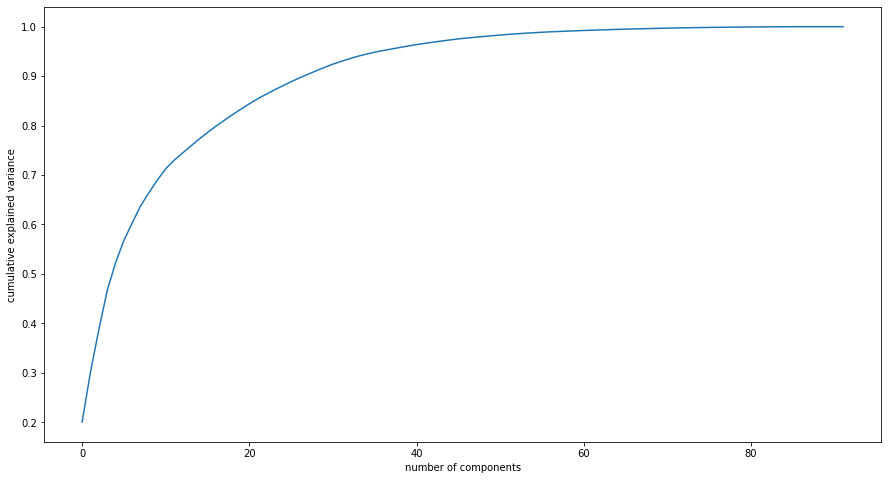

In [ ]:
# looking at Scree plot to Find the Components wiht MAX Information!
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


We can see that 95% of variance is explained by more than 38 PC's!

In [ ]:

pca_final = IncrementalPCA(n_components=38)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(255156, 38)

In [ ]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(109353, 38)

In [ ]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

# Since, there is class imbalance in TARGET VALUE, we can use "class_weight='balanced'" to balance out the transactions!

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.8'

In [ ]:
# Making prediction on TEST SET which is created while splitting
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

print(confusion_matrix(y_test,y_pred_default))
print(metrics.accuracy_score(y_test,y_pred_default))

[[83058 22786]
 [ 1120  2389]]
0.7813868846762321


In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'fraud_prob'})



fpr, tpr, thresholds =roc_curve(y_pred_final.fraud_flag,y_pred_final.fraud_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

ROC_AUC score:  0.8037991414670513


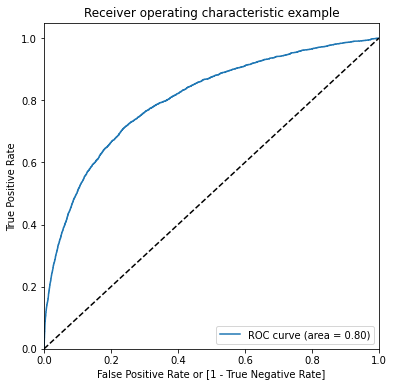

(array([0.00000000e+00, 9.44786667e-06, 9.44786667e-06, ...,
        9.99981104e-01, 9.99990552e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.84981476e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99794624, 0.99794624, 0.99782826, ..., 0.02598678, 0.02398586,
        0.02219082]))

In [ ]:
# Plotting the ROC Curve!
draw_roc(y_pred_final.fraud_flag, y_pred_final.fraud_prob)


### Random Forest on the actual Dataset with All features, since our TEST SET on which we have to make predictions is not a PCA DATASET.

We tried this PCA methodology to understand how can we make the difference!

In [ ]:

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(X_train,y_train)

# Making predictions
y_pred_default = rfc.predict(X_test)

In [ ]:
#Confusion matrix

confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[105739,    105],
       [  2295,   1214]])

In [ ]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Sensitivity:  0.35
Specificity:  1.0
false postive rate:  0.0
positive predictive value:  0.92
Negative predictive value:  0.98
Misclassification Rate:  0.02



Sensitivity means the ratio of churned customers identified correctly by the model. So, we want our Sensitivity scores to get better. Hyperparameter tuning can help us in this.

We are also, concerned about the accuracy.

In [ ]:

# # we are using 5 k-folds
# n_folds = 5
# # setting up the parameters to build the model
# parameters = {'max_depth': range(2, 20, 5)}

# rf = RandomForestClassifier(class_weight='balanced')


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy", n_jobs=-1, return_train_score=True)
# rf.fit(X_train, y_train)

In [ ]:
# # scores of GridSearch
# scores = rf.cv_results_

# # For visualiation of the accuracies with max_depth
# plt.figure()

# plt.plot(scores["param_max_depth"], 
#          scores["mean_train_score"], 
#          label="training accuracy")


# plt.plot(scores["param_max_depth"], 
#          scores["mean_test_score"], 
#          label="test accuracy")

# #Our brack of Accuracies
# plt.axhline(y=0.93, linestyle='--', color='r')
# plt.axhline(y=0.935, linestyle='--', color='g')
# plt.axvline(x=12, linestyle='-', color='b')
# plt.xlabel("max_depth")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

We can set the max_depth of the random forest to ***12*** as we are getting good accuracy for test and train set

Similarly we can tune the n_estimator (number of tress in the random forest)

In [ ]:
# #setting 5 k-fold
# n_folds = 5

# parameters = {'n_estimators': range(100, 1500, 400)}

# # We will use max_depth = 12 from our last tuning.
# rf = RandomForestClassifier(max_depth=12, class_weight='balanced')



# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy", n_jobs=-1, return_train_score=True)
# rf.fit(X_train, y_train)

In [ ]:
# # scores of GridSearch CV
# scores = rf.cv_results_


# plt.figure()
# plt.plot(scores["param_n_estimators"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_n_estimators"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("n_estimators")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

Considering the accuracies for Training and Test. We can also tune n_estimators 500 to 700.

In [ ]:
# # 5 k-fold 
# n_folds = 5

# # parameters to build the model on
# parameters = {'max_features': [8, 16, 24, 32]}


# rf = RandomForestClassifier(max_depth=12,class_weight='balanced')


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy", n_jobs=-1, return_train_score=True)
# rf.fit(X_train, y_train)

In [ ]:
# scores = rf.cv_results_

# # Visualizing
# plt.figure()
# plt.plot(scores["param_max_features"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_features"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_features")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

We can set max_features to 15 or 17. Let's set it to 15.

Let's now tune *min_sample_leaf*

In [ ]:
# # 5 k-fold
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_leaf': range(100, 400, 50)}

# # instantiate the model
# rf = RandomForestClassifier(class_weight='balanced')


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy", n_jobs=-1, return_train_score=True)
# rf.fit(X_train, y_train)

In [ ]:
# # scores of GridSearch CV
# scores = rf.cv_results_

# #Visualizing
# plt.figure()
# plt.plot(scores["param_min_samples_leaf"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_min_samples_leaf"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("min_samples_leaf")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

We can see the acuracy decreasing with min_samples_leaf, so we can set it to 100.

We will tune min_samples_split now

In [ ]:
# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_split': range(200, 500, 50)}

# # instantiate the model
# rf = RandomForestClassifier(class_weight='balanced')


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy", return_train_score=True)
# rf.fit(X_train, y_train)

In [ ]:
# # scores of GridSearch CV
# scores = rf.cv_results_

# # Visualizing accuracies with min_samples_split
# plt.figure()
# plt.plot(scores["param_min_samples_split"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_min_samples_split"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("min_samples_split")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

#### Tuning Parameters and their values:
The below values we got for the features after tuning:
max_depth 10 to 12

*   max_depth to 12
*   n_estimators 500 to 700
*   max_features 8 to 10
*   min_samples_leaf 10
*   min_samples_split 200

Since we have a range of possible values for the feauture. We can create parameter grid and create the best model

In [ ]:
# param_grid = {
#     'max_depth': [10,12],
#     'min_samples_leaf': [100],
#     'min_samples_split': [200],
#     'n_estimators': range(400, 800, 100), 
#     'max_features': [15, 17]
# }

# rf = RandomForestClassifier(class_weight='balanced')


# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
#                           cv = 5, n_jobs=-1, return_train_score=True,verbose=1)
# grid_search.fit(X_train, y_train)

In [ ]:
# print('We can get accuracy of',round(grid_search.best_score_,2),'using',grid_search.best_params_)

***`We can get accuracy of 0.88 using {'max_depth': 12, 'max_features': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 600}`***

This is the result of the **above print statement and GRID SEARCH CV on Random Forest Algo**, and hence we are going to use the same for our final MODEL!

Hence, our final model will have ***`'max_depth': 12, 'max_features': 17, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 600`***

In [ ]:
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=17,
                             n_estimators=600)

In [ ]:
#Fitting
rfc.fit(X_train,y_train)

#Predicting:
y_pred_default = rfc.predict(X_test)

In [ ]:
#Confusion matrix

confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[93814, 12030],
       [  941,  2568]])


Again, let's see the Sensitivity, Accuracy, Specificity etc

In [ ]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ', round(metrics.accuracy_score(y_test,y_pred_default),2))

# Let's see the sensitivity of our model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))   #precision

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),2))

Accuracy Score:   0.88
Sensitivity:  0.73
Specificity:  0.89
false postive rate:  0.11
positive predictive value:  0.18
Negative predictive value:  0.99
Misclassification Rate:  0.12


### Building a Deep Learning mode for the same!



*   Creating metrics such as **F1 Score/ Precision/ Recall** in order to measure the model against the same
*   Then a Keras Sequential Model with the evaluation metrics




In [ ]:
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

best_val_loss = 1

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1])) # input layer
model.add(Dense(units = 24, activation = 'relu')) # first hidden layer
model.add(Dropout(0.5)) # Dropout Layer!
model.add(Dense(units = 20, activation = 'relu')) # second hidden layer
model.add(Dense(units = 24, activation = 'relu')) # third hidden layer
model.add(Dense(units = 1, activation = 'sigmoid')) # Target Layer
model.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy',recall_m,precision_m,f1_m])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                1488      
_________________________________________________________________
dense_11 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 25        
Total params: 2,925
Trainable params: 2,925
Non-trainable params: 0
____________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import datetime,os
curr_dt_time = datetime.datetime.now()
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{precision_m:.5f}-{f1_m:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

# We have changed the Check point so that the best model gets saved. we are getting some NO SPACE ISSUE in NImbleBox, hence we have to do so
LR = ReduceLROnPlateau(monitor='f1_m', factor=0.5, patience=3, cooldown=1, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [ ]:
class_weight = {0: 1.,
                1: 1.}
model.fit(X_train,y_train, batch_size = 90, epochs = 15,callbacks=callbacks_list,class_weight=class_weight)

Epoch 1/15
2833/2836 [============================>.] - ETA: 0s - loss: 0.1366 - accuracy: 0.9613 - recall_m: 0.0056 - precision_m: 4.7516e-04 - f1_m: 7.3621e-04
Epoch 00001: loss improved from inf to 0.13660, saving model to model_init_2020-12-0704_18_13.844782/model-00001-0.13660-0.96129-0.00047-0.00074.h5
2836/2836 [==============================] - 14s 5ms/step - loss: 0.1366 - accuracy: 0.9613 - recall_m: 0.0056 - precision_m: 4.7466e-04 - f1_m: 7.3543e-04
Epoch 2/15
2834/2836 [============================>.] - ETA: 0s - loss: 0.1143 - accuracy: 0.9688 - recall_m: 0.1189 - precision_m: 0.2859 - f1_m: 0.1565
Epoch 00002: loss improved from 0.13660 to 0.11430, saving model to model_init_2020-12-0704_18_13.844782/model-00002-0.11430-0.96880-0.28573-0.15640.h5
2836/2836 [==============================] - 14s 5ms/step - loss: 0.1143 - accuracy: 0.9688 - recall_m: 0.1188 - precision_m: 0.2857 - f1_m: 0.1564
Epoch 3/15
2826/2836 [============================>.] - ETA: 0s - loss: 0.1111 -

In [ ]:
model_score = model.evaluate(X_test,y_test)
model_score

3418/3418 [==============================] - 9s 3ms/step - loss: 0.1312 - accuracy: 0.9725 - recall_m: 0.1618 - precision_m: 0.2175 - f1_m: 0.1764


[0.1311938762664795,
 0.9725110530853271,
 0.16177596151828766,
 0.21745170652866364,
 0.17637425661087036]

In [ ]:
cols = test_fraud_final.columns
test_fraud_final = pd.DataFrame(scale(test_fraud_final))
test_fraud_final.columns = cols
test_fraud_final.head()

,Transactiondatetime_insec,Amt_Transaction,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_debit,card6_debit or credit
0,-1.664920,-0.122273,1.124478,0.372813,-0.188234,0.634630,-0.266883,0.045925,-0.139919,-0.128585,-0.039312,-0.046438,-0.198572,-0.124078,-0.067657,-0.060122,-0.243171,-0.057868,-0.142276,-0.084554,-0.187726,-0.161082,2.177668,-0.084574,-0.104255,-0.098788,-0.236537,-0.366803,-0.088758,-0.073167,-0.281773,-0.20651,-0.087644,-0.106782,-0.101534,-0.344181,-0.249496,-0.089608,-0.124179,-0.12431,-0.085879,-0.101506,-0.15962,-0.819785,-0.697029,-0.26974,-0.402701,-0.156111,-0.359648,-0.449262,-0.413704,-0.17577,-0.046569,-0.092593,-0.081517,-0.091278,-0.09251,-0.122407,-0.15126,-0.118178,-0.123439,-0.159207,-0.161287,-0.375750,-0.315286,-0.346685,-0.002655,-0.089243,-0.112294,-0.104567,-0.141389,-0.400549,-0.063573,-0.285317,-0.243125,-0.275494,-0.243727,-0.082729,-0.092197,-0.093345,-0.073777,-0.12002,-0.107936,-0.162459,-0.223455,-0.136547,0.425030,-0.102268,-0.691580,0.730212,0.535227,-0.002655
1,1.350375,-0.356960,1.358937,-0.749681,-0.188234,-0.793218,-0.187977,0.045925,-0.123314,-0.128585,-0.039312,-0.046438,-0.232996,-0.146360,-0.067657,-0.060122,-0.081778,-0.057868,-0.142276,-0.084554,-0.277418,-0.133032,0.209583,-0.084574,-0.104255,-0.098788,-0.236537,-0.366803,-0.088758,-0.073167,-0.281773,-0.20651,-0.087644,-0.106782,-0.101534,-0.344181,-0.249496,-0.089608,-0.124179,-0.12431,-0.085879,-0.101506,-0.15962,-0.819785,-0.697029,-0.26974,-0.402701,-0.156111,-0.359648,-0.449262,-0.413704,-0.17577,-0.046569,-0.092593,-0.081517,-0.091278,-0.09251,-0.122407,-0.15126,-0.118178,-0.123439,-0.159207,-0.161287,-0.375750,-0.315286,-0.346685,-0.002655,-0.089243,-0.112294,-0.104567,-0.141389,-0.400549,-0.063573,-0.285317,-0.243125,-0.275494,-0.243727,-0.082729,-0.092197,-0.093345,-0.073777,-0.12002,-0.107936,-0.162459,-0.223455,-0.136547,0.425030,-0.102268,-0.691580,0.730212,0.535227,-0.002655
2,-1.555586,-0.140002,-1.135820,-1.183372,-0.188234,0.634630,0.453141,0.045925,-0.156524,-0.143686,-0.039312,-0.046438,-0.164148,-0.146360,-0.067657,-0.060122,-0.243171,-0.057868,-0.142276,-0.084554,-0.277418,-0.189133,-0.527740,-0.084574,-0.067260,-0.080950,-0.236537,0.514026,-0.088758,-0.073167,-0.281773,-0.20651,-0.087644,-0.064395,-0.085102,0.611691,0.325717,-0.089608,-0.124179,-0.12431,-0.085879,-0.083584,-0.15962,0.283372,0.080071,-0.26974,0.418037,-0.156111,0.462878,1.814325,1.251450,-0.17577,-0.046569,-0.092593,-0.081517,-0.091278,-0.09251,-0.122407,-0.15126,-0.118178,-0.123439,-0.159207,-0.161287,-0.375750,-0.315286,-0.346685,-0.002655,-0.089243,-0.069798,-0.088093,-0.141389,0.550667,-0.063573,0.287940,1.370099,1.558744,1.077843,-0.082729,-0.092197,-0.093345,-0.073777,-0.12002,-0.107936,-0.162459,-0.223455,-0.136547,0.425030,-0.102268,-0.691580,0.730212,0.535227,-0.002655
3,1.052931,-0.002381,-1.674298,-1.266284,-0.188234,-1.959295,-1.657616,0.045925,-0.156524,-0.143686,-0.039312,-0.021136,-0.232996,-0.146360,-0.067657,-0.013015,-0.296969,-0.006130,-0.142276,-0.084554,-0.304325,-0.189133,-0.652518,-0.084574,-0.104255,-0.098788,-0.236537,-0.366803,-0.088758,-0.073167,-0.281773,-0.20651,-0.087644,-0.106782,-0.101534,-0.344181,-0.249496,-0.089608,-0.124179,-0.12431,-0.085879,-0.101506,-0.15962,0.283372,0.080071,-0.26974,-0.402701,-0.156111,-0.359648,-0.449262,-0.413704,-0.17577,-0.046569,-0.092593,-0.081517,-0.091278,-0.09251,-0.122407,-0.15126,-0.118178,-0.123439,-0.159207,-0.161287,1.963769,1.278768,1.602325,-0.002655,-0.089243,-0.112294,-0.104567,-0.141389,-0.400549,-0.063573,-0.285317,-0.243125,-0.275

Now, since we cannot drop any ID for the TEST SET against which we have to make the submission, hence we IMPUTE AGAIN in the TEST SET in the same manner we did for TRAIN SET!

In [ ]:
# test_fraud_final = test_fraud_final.dropna(axis=0)
# data_frame(test_fraud_final)

# Fetching new set of Columns!
test_fraud_final_cols = test_fraud_final.columns

# Using FANCY IMPUTER Methodology for Imputing in an AUTOMATED MANNER on the TEST SET also
test_fraud_imputing = MICE(n_iter=1).fit_transform(test_fraud_final)
test_fraud_ready = pd.DataFrame(test_fraud_imputing, columns=test_fraud_final_cols)
data_frame(test_fraud_ready)

,Missing Value Count,% of Missing,DTYPE
Transactiondatetime_insec,0,0.0,float64
V297,0,0.0,float64
V306,0,0.0,float64
V305,0,0.0,float64
V304,0,0.0,float64
V303,0,0.0,float64
V302,0,0.0,float64
V301,0,0.0,float64
V300,0,0.0,float64
V299,0,0.0,float64


In [ ]:

#Predicting on the test set and then will merge into Submission -> Random Forest!
y_pred_default_test = rfc.predict(test_fraud_ready)

In [ ]:
Counter(y_pred_default_test)

Counter({0: 91069, 1: 50759})

In [ ]:
print('Test Data Shape:',test_data.shape)
print('Submission Data Shape:',submission_data.shape)
print('Length of our Prediction!',len(y_pred_default_test))

Test Data Shape: (141828, 86)
Submission Data Shape: (141828, 2)
Length of our Prediction! 141828


In [ ]:
submission_data = submission_data.drop(['fraud_flag'],axis=1)
submission_data.head()

,transactionid
0,364510
1,364511
2,364512
3,364513
4,364514


In [ ]:
testing_data = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/test.csv')
testing_data['fraud_flag'] = y_pred_default_test
submission_data = pd.merge(submission_data, testing_data, on='transactionid')

In [ ]:
sub1 = submission_data.loc[:,['transactionid','fraud_flag']].to_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/submission_data.csv')

In [ ]:
# from google.colab import files
# files.download('/content/drive/MyDrive/Upgrad-Rise-Hackathon/submission_data.csv')

In [ ]:
X_resample, y_resample = SMOTE().fit_sample(predictor_variables, target_variable)
X_resample.shape


counter = Counter(y_resample)
print(counter)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



Counter({0: 352439, 1: 352439})


In [ ]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = X_train.shape[1], units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                1488      
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 2,925
Trainable params: 2,925
Non-trainable params: 0
____________________________________________________

In [ ]:
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
32895/32895 [==============================] - 99s 3ms/step - loss: 0.4787 - accuracy: 0.7726 - f1_m: 0.7503
Epoch 2/5
32895/32895 [==============================] - 99s 3ms/step - loss: 0.4330 - accuracy: 0.7977 - f1_m: 0.7762
Epoch 3/5
32895/32895 [==============================] - 98s 3ms/step - loss: 0.4135 - accuracy: 0.8075 - f1_m: 0.7886
Epoch 4/5
32895/32895 [==============================] - 98s 3ms/step - loss: 0.4034 - accuracy: 0.8137 - f1_m: 0.7957
Epoch 5/5
32895/32895 [==============================] - 97s 3ms/step - loss: 0.3970 - accuracy: 0.8171 - f1_m: 0.8011


In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

6609/6609 [==============================] - 14s 2ms/step - loss: 0.4103 - accuracy: 0.8234 - f1_m: 0.8163
[0.4103182554244995, 0.8234025835990906, 0.816255509853363]


In [ ]:
#Predicting on the test set and then will merge into Submission -> Sequential Learning
y_pred_default_test = model.predict(test_fraud_ready)
y_pred_default_test

array([[0.59156024],
       [0.27689913],
       [0.40650508],
       ...,
       [0.74848443],
       [0.06263793],
       [0.2755152 ]], dtype=float32)

In [ ]:
y_pred_default_test[9]

array([0.4251708], dtype=float32)

In [ ]:
for idx, x in np.ndenumerate(y_pred_default_test):
  if x < 0.5:
    y_pred_default_test[idx] = 0
  else:
    y_pred_default_test[idx] = 1

y_pred_default_test = y_pred_default_test.astype(int)

In [ ]:
y_pred_default_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
testing_data = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/test.csv')
testing_data['fraud_flag'] = y_pred_default_test
submission_data = pd.read_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/sample_submission.csv')
submission_data = submission_data.drop(['fraud_flag'],axis=1)
submission_data = pd.merge(submission_data, testing_data, on='transactionid')

sub1 = submission_data.loc[:,['transactionid','fraud_flag']]
sub1.to_csv('/content/drive/MyDrive/Upgrad-Rise-Hackathon/submission_data_1.csv')

from google.colab import files
files.download('/content/drive/MyDrive/Upgrad-Rise-Hackathon/submission_data_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>